# Predicting With vertual premir league Data 

#### Importing sklearn maching learning algorithems and other main libaries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score

#### Accesing data 

In [2]:
df = pd.read_csv('./Prediction_train&test_Data/premier_leage_data.csv')
print(df.shape)
df.head(5)

(30, 4)


,events,weeks,score,teams_index
0,EVE-TOT,1,Away,49-51
1,ARS-ASV,1,Away,48-60
2,LEI-BUR,1,Home,63-64
3,BRN-NOR,1,Draw,972-66
4,NWC-CHE,1,Away,53-47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   events       30 non-null     object
 1   weeks        30 non-null     int64 
 2   score        30 non-null     object
 3   teams_index  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [4]:
new_events = []
new_score = []
new_team_index = []
new_week_index = []

def set_weak_index(x):
    new_week_index.append(x)
    new_week_index.append(x)

def get_team_index(x):
    data = np.float64(x.lower().split('-'))
    new_team_index.append(data[0])
    new_team_index.append(data[-1])

def split_events(x):
    data = x.lower().split('-')
    new_events.append(data[0])
    new_events.append(data[-1])
    
def get_score(x):
    if x == 'Home':
        new_score.append('won')
        new_score.append('loss')
    elif x == 'Away':
        new_score.append('loss')
        new_score.append('won')
    else:
        new_score.append('Draw')
        new_score.append('Draw')

In [5]:
_ = df.events.apply(split_events)
_ = df.score.apply(get_score)
_ = df.teams_index.apply(get_team_index)
_ = df.weeks.apply(set_weak_index)

In [6]:
df2 = pd.DataFrame({'events': new_events, 'wins': new_score, 'teams_index': new_team_index, 'weeaks': new_week_index})

In [7]:
df2.head(10)

,events,wins,teams_index,weeaks
0,eve,loss,49.0,1
1,tot,won,51.0,1
2,ars,loss,48.0,1
3,asv,won,60.0,1
4,lei,won,63.0,1
5,bur,loss,64.0,1
6,brn,Draw,972.0,1
7,nor,Draw,66.0,1
8,nwc,loss,53.0,1
9,che,won,47.0,1


#### Spliting Data for training and testing 

In [8]:
x = df2[['teams_index', 'weeaks']] # df2.teams_index.values.reshape(-1, 1) # df2.teams_index.view(-1, 1)
y = df2.wins
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Importting all ML algorithems for trainning and testing model

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#### Initalizing all ML models with out it's paramiters

In [10]:
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

#### Fitting model 

In [11]:
dtc.fit(x_train, y_train)
gnb.fit(x_train, y_train)
svc.fit(x_train, y_train)
rfc.fit(x_train, y_train)
abc.fit(x_train, y_train)
# df2.groupby('teams_index').count()

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

#### Predicting trainning error

In [12]:
dtc_train_pred = dtc.predict(x_train)
gnb_train_pred = gnb.predict(x_train)
svc_train_pred = svc.predict(x_train)
rfc_train_pred = rfc.predict(x_train)
abc_train_pred = abc.predict(x_train)

#### Predicting testing error

In [13]:
dtc_test_pred = dtc.predict(x_test)
gnb_test_pred = gnb.predict(x_test)
svc_test_pred = svc.predict(x_test)
rfc_test_pred = rfc.predict(x_test)
abc_test_pred = abc.predict(x_test)

#### Caluating The Accuraccy of train prediction

In [14]:
dtc_train_acc = accuracy_score(y_train, dtc_train_pred)
gnb_train_acc = accuracy_score(y_train, gnb_train_pred)
svc_train_acc = accuracy_score(y_train, svc_train_pred)
rfc_train_acc = accuracy_score(y_train, rfc_train_pred)
abc_train_acc = accuracy_score(y_train, abc_train_pred)

In [15]:
print(f'Accuracy for training data of DecisionTreeClassifier is .....{dtc_train_acc}')
print(f'Accuracy for training data of GaussianNB is .....{gnb_train_acc}')
print(f'Accuracy for training data of Support Vectore Maching Classifer is .....{svc_train_acc}')
print(f'Accuracy for training data of RandomForestClassifier is .....{rfc_train_acc}')
print(f'Accuracy for training data of AdaBoostClassifier is .....{abc_train_acc}')

Accuracy for training data of DecisionTreeClassifier is .....1.0
Accuracy for training data of GaussianNB is .....0.4583333333333333
Accuracy for training data of Support Vectore Maching Classifer is .....0.5
Accuracy for training data of RandomForestClassifier is .....1.0
Accuracy for training data of AdaBoostClassifier is .....1.0


#### Caluating The Accuraccy of test prediction

In [16]:
dtc_test_acc = accuracy_score(y_test, dtc_test_pred)
gnb_test_acc = accuracy_score(y_test, gnb_test_pred)
svc_test_acc = accuracy_score(y_test, svc_test_pred)
rfc_test_acc = accuracy_score(y_test, rfc_test_pred)
abc_test_acc = accuracy_score(y_test, abc_test_pred)

In [17]:
print(f'Accuracy for training data of DecisionTreeClassifier is .....{dtc_test_acc}')
print(f'Accuracy for training data of GaussianNB is .....{gnb_test_acc}')
print(f'Accuracy for training data of Support Vectore Maching Classifer is .....{svc_test_acc}')
print(f'Accuracy for training data of RandomForestClassifier is .....{rfc_test_acc}')
print(f'Accuracy for training data of AdaBoostClassifier is .....{abc_test_acc}')

Accuracy for training data of DecisionTreeClassifier is .....0.4166666666666667
Accuracy for training data of GaussianNB is .....0.3333333333333333
Accuracy for training data of Support Vectore Maching Classifer is .....0.25
Accuracy for training data of RandomForestClassifier is .....0.4166666666666667
Accuracy for training data of AdaBoostClassifier is .....0.4166666666666667


#### Visuzlaisation for the best posible model for overfiting and biais

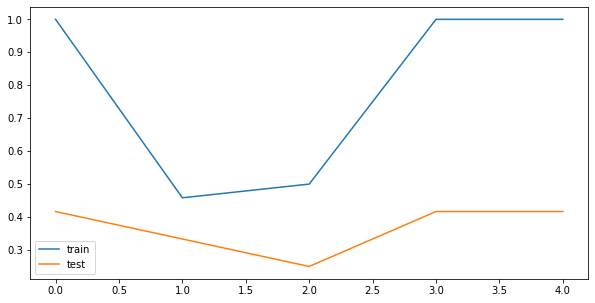

In [18]:
figure = plt.figure(figsize = [10, 5])
train_x = [dtc_train_acc, gnb_train_acc, svc_train_acc, rfc_train_acc, abc_train_acc]
test_x = [dtc_test_acc, gnb_test_acc, svc_test_acc, rfc_test_acc, abc_test_acc]
y_axis = np.arange(len(train_x))
# sb.pointplot(x = train_x, y=y_axis, ci=None, linestyles='-')
plt.plot(train_x)
plt.plot(test_x)
plt.legend(['train', 'test']);

### Tunning models

#### Tunning decition tree classifier for trainning and testing errors

In [19]:
dtc_one = DecisionTreeClassifier(max_depth=10, min_samples_split=20)
dtc_two = DecisionTreeClassifier(max_depth=10, min_samples_split=20)
dtc_three = DecisionTreeClassifier(max_depth=10, min_samples_split=20)

#### Tunning support vector clasifierie for trainning and testing errors

In [20]:
svc_one = SVC(kernel='poly', degree=2)
svc_two = SVC(kernel='poly', degree=3)
svc_three = SVC(kernel='poly', degree=4)
svc_four = SVC(kernel='rbf', gamma=0.1)
svc_five = SVC(kernel='rbf', gamma=1)
svc_six = SVC(C=1e9, gamma=1e-07)

#### Trainning Tuned SVC

In [21]:
svc_one.fit(x_train, y_train)
svc_two.fit(x_train, y_train)
svc_three.fit(x_train, y_train)
svc_four.fit(x_train, y_train)
svc_five.fit(x_train, y_train)
svc_six.fit(x_train, y_train)

SVC(C=1000000000.0, gamma=1e-07)

#### Predicting tunned svc for trainning error 

In [22]:
pred_svc_one_train = svc_one.predict(x_train)
pred_svc_two_train = svc_two.predict(x_train)
pred_svc_three_train = svc_three.predict(x_train)
pred_svc_four_train = svc_four.predict(x_train)
pred_svc_five_train = svc_five.predict(x_train)
pred_svc_six_train = svc_six.predict(x_train)

#### Calculating accuracy for tunned svc for trainning error

In [23]:
acc_svc_one_train =  accuracy_score(y_train, pred_svc_one_train)
acc_svc_two_train = accuracy_score(y_train, pred_svc_two_train)
acc_svc_three_train = accuracy_score(y_train, pred_svc_three_train)
acc_svc_four_train = accuracy_score(y_train, pred_svc_four_train)
acc_svc_five_train = accuracy_score(y_train, pred_svc_five_train)
acc_svc_six_train = accuracy_score(y_train, pred_svc_six_train)

print([acc_svc_one_train, acc_svc_two_train, acc_svc_three_train, acc_svc_four_train, acc_svc_five_train, acc_svc_six_train])

[0.5, 0.5, 0.5, 0.6875, 0.875, 0.6041666666666666]


#### Predicting tunned svc for testing error 

In [24]:
pred_svc_one_test = svc_one.predict(x_test)
pred_svc_two_test = svc_two.predict(x_test)
pred_svc_three_test = svc_three.predict(x_test)
pred_svc_four_test = svc_four.predict(x_test)
pred_svc_five_test = svc_five.predict(x_test)
pred_svc_six_test = svc_six.predict(x_test)

#### Calculating accuracy for tunned svc for testing error

In [25]:
acc_svc_one_test =  accuracy_score(y_test, pred_svc_one_test)
acc_svc_two_test = accuracy_score(y_test, pred_svc_two_test)
acc_svc_three_test = accuracy_score(y_test, pred_svc_three_test)
acc_svc_four_test = accuracy_score(y_test, pred_svc_four_test)
acc_svc_five_test = accuracy_score(y_test, pred_svc_five_test)
acc_svc_six_test = accuracy_score(y_test, pred_svc_six_test)

print([acc_svc_one_test, acc_svc_two_test, acc_svc_three_test, acc_svc_four_test, acc_svc_five_test, acc_svc_six_test])

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.25, 0.16666666666666666, 0.4166666666666667]


#### random forest clasifierie for trainning and testing errors

In [26]:
rfc = RandomForestClassifier()

#### Tunning adaboost clasifierie for trainning and testing errors

In [27]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())